In [26]:
import pandas as pd
import numpy as np
import mlcroissant as mlc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [27]:
# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/uciml/adult-census-income/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

  -  [Metadata(Adult Census Income)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="adult.csv")]


,adult.csv/age,adult.csv/workclass,adult.csv/fnlwgt,adult.csv/education,adult.csv/education.num,adult.csv/marital.status,adult.csv/occupation,adult.csv/relationship,adult.csv/race,adult.csv/sex,adult.csv/capital.gain,adult.csv/capital.loss,adult.csv/hours.per.week,adult.csv/native.country,adult.csv/income
0,90,b'?',77053,b'HS-grad',9,b'Widowed',b'?',b'Not-in-family',b'White',b'Female',0,4356,40,b'United-States',b'<=50K'
1,82,b'Private',132870,b'HS-grad',9,b'Widowed',b'Exec-managerial',b'Not-in-family',b'White',b'Female',0,4356,18,b'United-States',b'<=50K'
2,66,b'?',186061,b'Some-college',10,b'Widowed',b'?',b'Unmarried',b'Black',b'Female',0,4356,40,b'United-States',b'<=50K'
3,54,b'Private',140359,b'7th-8th',4,b'Divorced',b'Machine-op-inspct',b'Unmarried',b'White',b'Female',0,3900,40,b'United-States',b'<=50K'
4,41,b'Private',264663,b'Some-college',10,b'Separated',b'Prof-specialty',b'Own-child',b'White',b'Female',0,3900,40,b'United-States',b'<=50K'


In [28]:
df = record_set_df
print(df.shape)
print(df.columns.tolist())
df.head()

(32561, 15)
['adult.csv/age', 'adult.csv/workclass', 'adult.csv/fnlwgt', 'adult.csv/education', 'adult.csv/education.num', 'adult.csv/marital.status', 'adult.csv/occupation', 'adult.csv/relationship', 'adult.csv/race', 'adult.csv/sex', 'adult.csv/capital.gain', 'adult.csv/capital.loss', 'adult.csv/hours.per.week', 'adult.csv/native.country', 'adult.csv/income']


,adult.csv/age,adult.csv/workclass,adult.csv/fnlwgt,adult.csv/education,adult.csv/education.num,adult.csv/marital.status,adult.csv/occupation,adult.csv/relationship,adult.csv/race,adult.csv/sex,adult.csv/capital.gain,adult.csv/capital.loss,adult.csv/hours.per.week,adult.csv/native.country,adult.csv/income
0,90,b'?',77053,b'HS-grad',9,b'Widowed',b'?',b'Not-in-family',b'White',b'Female',0,4356,40,b'United-States',b'<=50K'
1,82,b'Private',132870,b'HS-grad',9,b'Widowed',b'Exec-managerial',b'Not-in-family',b'White',b'Female',0,4356,18,b'United-States',b'<=50K'
2,66,b'?',186061,b'Some-college',10,b'Widowed',b'?',b'Unmarried',b'Black',b'Female',0,4356,40,b'United-States',b'<=50K'
3,54,b'Private',140359,b'7th-8th',4,b'Divorced',b'Machine-op-inspct',b'Unmarried',b'White',b'Female',0,3900,40,b'United-States',b'<=50K'
4,41,b'Private',264663,b'Some-college',10,b'Separated',b'Prof-specialty',b'Own-child',b'White',b'Female',0,3900,40,b'United-States',b'<=50K'


In [29]:
# Fix column name
df.columns = df.columns.str.replace(r'^.*?/', '', regex=True)

# Fix values
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

print(df.columns.tolist())
df.head()

/tmp/ipython-input-3528628513.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [30]:
# Define categorical and numerical columns
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation','relationship', 'race', 'sex', 'native.country']

numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

target_col = 'income'

In [31]:
# Missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [32]:
# Encode target
y = df[target_col].map({'<=50K': 0, '>50K': 1})

# Encode categorical features
encoder = OrdinalEncoder()
X_cat = encoder.fit_transform(df[categorical_cols])

# Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(df[numerical_cols])

# Combine features
X = np.hstack([X_num, X_cat])

In [33]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42)

In [48]:
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_tabpfn = TabPFNClassifier(device='cuda', ignore_pretraining_limits=True)
clf_tabpfn.fit(X_train, y_train)
y_pred_tabpfn = clf_tabpfn.predict(X_test)

print("TabPFN Accuracy:", accuracy_score(y_test, y_pred_tabpfn))
print(classification_report(y_test, y_pred_tabpfn))

TabPFN Accuracy: 0.8581137079396651
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4533
           1       0.76      0.63      0.69      1500

    accuracy                           0.86      6033
   macro avg       0.82      0.78      0.80      6033
weighted avg       0.85      0.86      0.85      6033



In [34]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8602685231228244
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4533
           1       0.75      0.65      0.70      1500

    accuracy                           0.86      6033
   macro avg       0.82      0.79      0.80      6033
weighted avg       0.86      0.86      0.86      6033



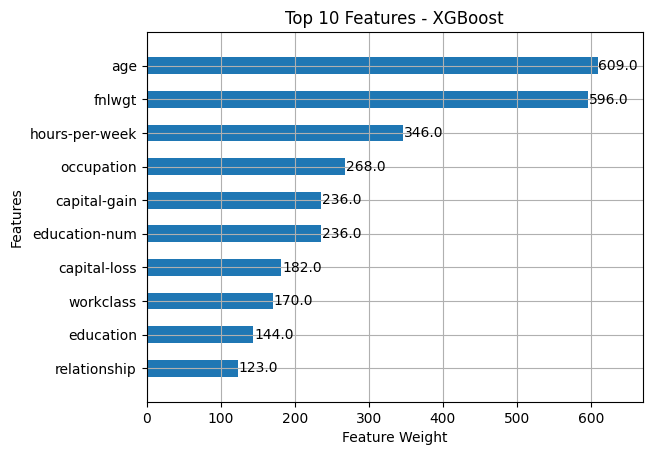

In [45]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Make sure feature_names matches the order used for training
numerical_cols = [
    'age', 'fnlwgt', 'education-num', 'capital-gain',
    'capital-loss', 'hours-per-week'
]
categorical_cols = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country'
]
# 'fnlwgt' = final weight

feature_names = numerical_cols + categorical_cols

# Pass feature_names when plotting
plot_importance(clf_xgb, max_num_features=10, importance_type='weight', xlabel='Feature Weight', height=0.5)
plt.title("Top 10 Features - XGBoost")
ax = plt.gca()
ax.set_yticklabels([feature_names[int(label.get_text()[1:])] for label in ax.get_yticklabels()])
plt.show()



In [46]:
from sklearn.metrics import accuracy_score, classification_report


# Downsample training set
downsample_size = 2000  # adjust as needed
sample_idx = np.random.choice(len(X_train), size=downsample_size, replace=False)
X_train_tabpfn = X_train[sample_idx]
y_train_tabpfn = y_train[sample_idx]

print(f"TabPFN training on {downsample_size} samples out of {len(X_train)} total rows.")


# Train TabPFN on GPU
clf_tabpfn = TabPFNClassifier(device='cuda')  # 'cuda' will use the L4 GPU in Colab Pro
clf_tabpfn.fit(X_train_tabpfn, y_train_tabpfn)


# Evaluate
y_pred_tabpfn = clf_tabpfn.predict(X_test)

print("TabPFN Accuracy:", accuracy_score(y_test, y_pred_tabpfn))
print(classification_report(y_test, y_pred_tabpfn))

TabPFN training on 2000 samples out of 24129 total rows.
TabPFN Accuracy: 0.8475053870379579
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4533
           1       0.75      0.58      0.66      1500

    accuracy                           0.85      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033

